In [2]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl

import seaborn as sns

import pickle

import numpy as np

from prol.process import get_cycle, get_multi_cycle

## 3 Cases of PL (Bernoulli)

Text(0.5, 1.0, 'Scenario 3\nDependent samples from a Markov chain')

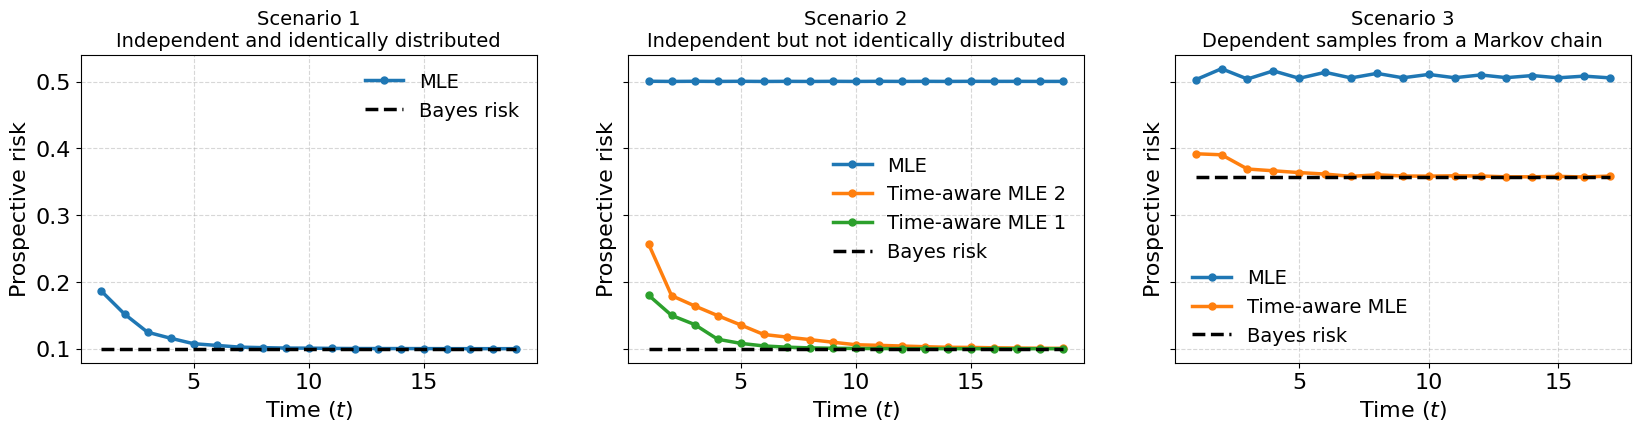

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

file = '/Users/ashwindesilva/research/ProL/notebooks/results/scenario1.npy'
outputs = np.load(file, allow_pickle=True).tolist()

ax = axes[0]

ax.plot(outputs['time'], outputs['risk'], lw=2.5, marker='o', ms=5, label='MLE')
ax.plot(outputs['time'], 0.1 * np.ones(len(outputs['time'])), ls='dashed', color='k', lw=2.5, label='Bayes risk')
ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.legend(frameon=False, fontsize=14)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Scenario 1' + '\n' + 'Independent and identically distributed', fontsize=14)

ax = axes[1]

file = '/Users/ashwindesilva/research/ProL/notebooks/results/scenario2.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Time-aware MLE 2', r'Time-aware MLE 1']

for i, label in enumerate(labels):
    ax.plot(outputs['time'], outputs['risk'][:, i], lw=2.5, marker='o', ms=5, label=label)
ax.plot(outputs['time'], 0.1 * np.ones(len(outputs['time'])), ls='dashed', color='k', lw=2.5, label='Bayes risk')
ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.legend(frameon=False, fontsize=14)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Scenario 2' + '\n' + 'Independent but not identically distributed', fontsize=14)

ax = axes[2]

file = '/Users/ashwindesilva/research/ProL/notebooks/results/scenario3_disc.npy'
outputs = np.load(file, allow_pickle=True).tolist()

labels = [r'MLE', r'Time-aware MLE']
keys = ['avg_erm', 'avg_pr']

for i, label in enumerate(labels):
    ax.plot(np.arange(1, 18, 1), outputs[keys[i]], lw=2.5, marker='o', ms=5, label=label)
ax.plot(np.arange(1, 18, 1), 0.357 * np.ones(17), ls='dashed', color='k', lw=2.5, label='Bayes risk')
ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.legend(frameon=False, fontsize=14)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Scenario 3' + '\n' + 'Dependent samples from a Markov chain', fontsize=14)

In [129]:
fig.savefig("figures/pl_cases_fig.pdf", bbox_inches='tight')

## Independent but not identical (scenario 2)

In [4]:
# mnist 3 tasks
# files = [
#     'experiments/vision_multi/multirun/2024-05-17/01-17-46',
#     'experiments/vision_multi/multirun/2024-05-17/01-18-56',
#     'experiments/vision_multi/multirun/2024-05-17/12-39-24',
#     'experiments/vision_multi/multirun/2024-05-18/12-20-48',
#     'experiments/vision_multi/multirun/2024-05-18/01-08-37',
# ]

# 2024-05-18/12-20-48
# 2024-05-17/01-19-58

# mnist 4 tasks
# files = [
#     'experiments/vision_multi/multirun/2024-05-18/04-22-52',
#     'experiments/vision_multi/multirun/2024-05-18/05-07-18',
#     None,
#     'experiments/vision_multi/multirun/2024-05-18/04-21-20',
#     'experiments/vision_multi/multirun/2024-05-18/10-28-45',
# ]

# CIFAR 3 tasks
# files = [
#     'experiments/vision_multi/multirun/2024-05-17/02-47-05',
#     'experiments/vision_multi/multirun/2024-05-17/02-47-37',
#     'experiments/vision_multi/multirun/2024-05-17/12-37-03',
#     'experiments/vision_multi/multirun/2024-05-17/04-05-44',
#     'experiments/vision_multi/multirun/2024-05-18/01-33-26',
# ]

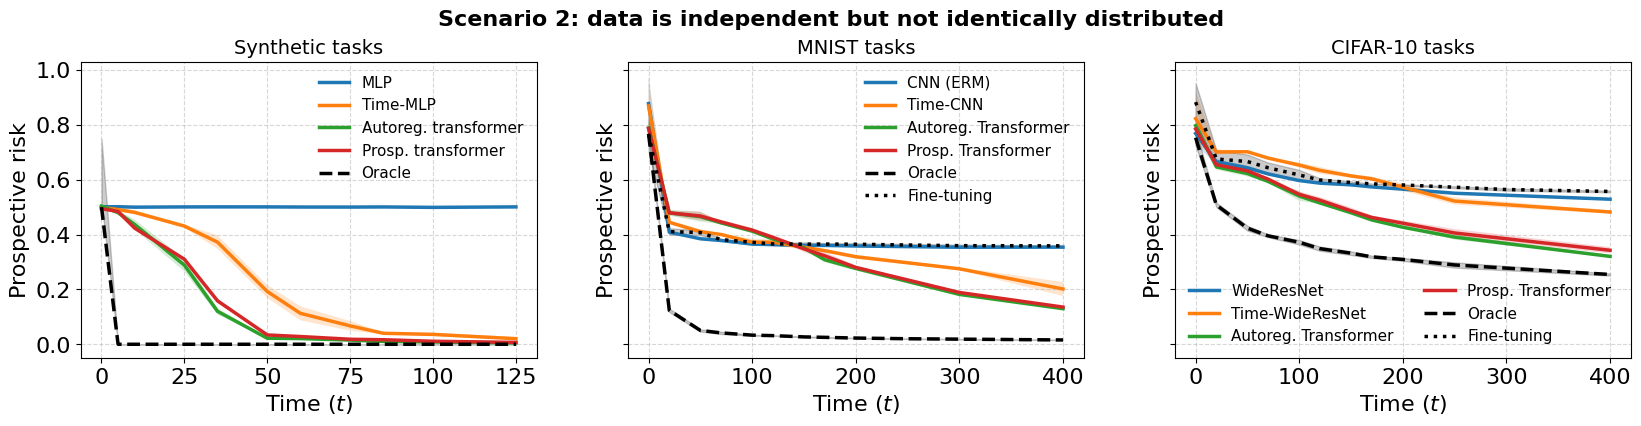

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

fig.suptitle('Scenario 2: data is independent but not identically distributed', fontsize=16, fontweight='bold')

# Syntheic 
ax = axes[0]

files = [
    'experiments/synthetic/multirun/2024-05-21/04-03-25',
    'experiments/synthetic/multirun/2024-05-21/03-36-07',
    'experiments/synthetic/multirun/2024-05-21/03-37-20', 
    'experiments/synthetic/multirun/2024-05-21/03-36-54', 
    'experiments/synthetic/multirun/2024-05-21/03-38-14', 
    None
]

names = [
    'MLP',
    'Time-MLP',
    'Autoreg. transformer',
    'Prosp. transformer',
    'Oracle',
    'Fine-tuning'
]
N = 20

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(11):
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        time_list = np.array(time_list)/N
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            risk_list[0] = 0.5
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        elif name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            t_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/N
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(t_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Synthetic tasks', fontsize=14)


# MNIST
ax = axes[1]

files = [
    'experiments/vision_multi/multirun/2024-05-18/22-58-41',
    'experiments/vision_multi/multirun/2024-05-18/23-27-44',
    'experiments/vision_multi/multirun/2024-05-18/23-01-03',
    'experiments/vision_multi/multirun/2024-05-18/23-00-10',
    'experiments/vision_multi/multirun/2024-05-19/02-22-55',
    'experiments/vision_multi/multirun/2024-05-19/02-42-33',
]

names = [
    'CNN (ERM)',
    'Time-CNN',
    'Autoreg. Transformer',
    'Prosp. Transformer',
    'Oracle',
    'Fine-tuning'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(13):
            if name != 'Oracle' and i == 1:
                continue
            if i == 10:
                continue
            fname = f'{file}/{i}/outputs.pkl'
            try:
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
            except FileNotFoundError:
                break
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        time_list = np.array(time_list)/10
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        elif name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            time_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/10
            ax.plot(time_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11)
ax.grid(alpha=0.5, ls='--')
ax.set_title('MNIST tasks', fontsize=14)


# CIFAR-10 
ax = axes[2]

files = [
    'experiments/vision_multi/multirun/2024-05-19/03-19-00',
    'experiments/vision_multi/multirun/2024-05-19/04-01-55',
    'experiments/vision_multi/multirun/2024-05-19/20-20-23', 
    'experiments/vision_multi/multirun/2024-05-19/20-20-04', 
    'experiments/vision_multi/multirun/2024-05-19/10-20-30',
    'experiments/vision_multi/multirun/2024-05-19/10-20-53'
]

names = [
    'WideResNet',
    'Time-WideResNet',
    'Autoreg. Transformer',
    'Prosp. Transformer',
    'Oracle',
    'Fine-tuning'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(12):
            if i == 10:
                continue
            fname = f'{file}/{i}/outputs.pkl'
            try:
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
            except FileNotFoundError:
                break
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        time_list = np.array(time_list)/10
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        elif name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            t_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/10
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(t_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11, ncols=2)
ax.grid(alpha=0.5, ls='--')
ax.set_title('CIFAR-10 tasks', fontsize=14)

plt.subplots_adjust(top=0.85)

plt.show()

In [86]:
fig.savefig("figures/case2_fig.pdf", bbox_inches='tight')

## Dependent (scenario 3)

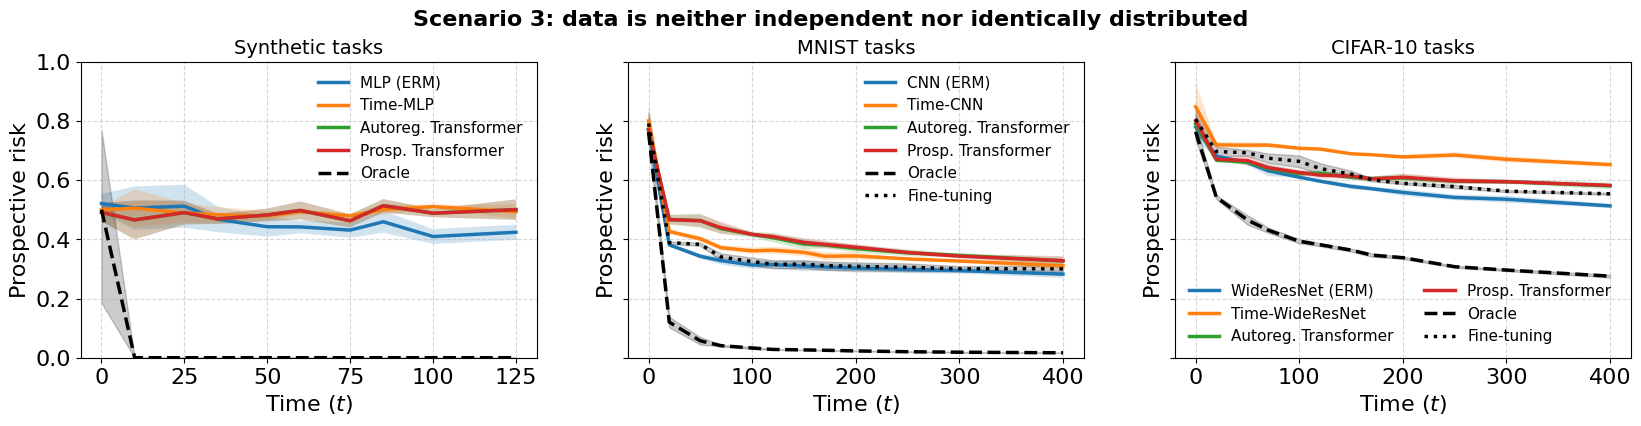

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

fig.suptitle('Scenario 3: data is neither independent nor identically distributed', fontsize=16, fontweight='bold')

ax = axes[0]

# Synthetic tasks
files = [
    'experiments/synthetic_markov/multirun/2024-05-20/01-57-02',
    'experiments/synthetic_markov/multirun/2024-05-20/01-56-21',
    'experiments/synthetic_markov/multirun/2024-05-20/01-56-44',
    'experiments/synthetic_markov/multirun/2024-05-20/01-56-44',
    'experiments/synthetic_markov/multirun/2024-05-20/02-13-08',
    None
]

names = [
    'MLP (ERM)',
    'Time-MLP',
    'Autoreg. Transformer',
    'Prosp. Transformer',
    'Oracle',
    'Fine-tuning'
]
N = 20

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(11):
            if i == 1:
                continue
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        time_list = np.array(time_list)/N
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            risk_list[0] = 0.5
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        elif name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            t_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/N
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(t_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Synthetic tasks', fontsize=14)


# MNIST

ax = axes[1]

files = [
    'experiments/vision_markov/multirun/2024-05-19/13-46-58',
    'experiments/vision_markov/multirun/2024-05-19/14-27-26',
    'experiments/vision_markov/multirun/2024-05-19/20-09-04',
    'experiments/vision_markov/multirun/2024-05-19/15-15-33',
    'experiments/vision_markov/multirun/2024-05-19/20-12-51',
    'experiments/vision_markov/multirun/2024-05-19/20-14-17'
]

names = [
    'CNN (ERM)',
    'Time-CNN',
    'Autoreg. Transformer',
    'Prosp. Transformer',
    'Oracle',
    'Fine-tuning'
]
N = 10

for file, name in zip(files, names):
    if file:
        if name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            time_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/N
            ax.plot(time_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            time_list = []
            risk_list = []
            ci_list = []
            for i in range(12):
                fname = f'{file}/{i}/outputs.pkl'
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
                time_list.append(outputs['args']['t'])
                risk_list.append(outputs['risk'])
                ci_list.append(outputs['ci_risk'])
            time_list = np.array(time_list)/N 
            risks = np.array(risk_list)
            ci = np.array(ci_list)
            if name == 'Oracle':
                ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
                ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
            else:
                ax.plot(time_list, risk_list, lw=2.5, label=name)
                ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11)
ax.grid(alpha=0.5, ls='--')
ax.set_title('MNIST tasks', fontsize=14)


# CIFAR-10
ax = axes[2]

files = [
    'experiments/vision_markov/multirun/2024-05-21/10-46-47',
    'experiments/vision_markov/multirun/2024-05-21/03-48-45',
    'experiments/vision_markov/multirun/2024-05-21/03-51-14',
    'experiments/vision_markov/multirun/2024-05-21/03-51-06',
    'experiments/vision_markov/multirun/2024-05-21/03-52-17',
    'experiments/vision_markov/multirun/2024-05-21/09-17-03',
]

names = [
    'WideResNet (ERM)',
    'Time-WideResNet',
    'Autoreg. Transformer',
    'Prosp. Transformer',
    'Oracle',
    'Fine-tuning'
]
N = 10

for file, name in zip(files, names):
    if file:
        if name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            time_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/N
            ax.plot(time_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            time_list = []
            risk_list = []
            ci_list = []
            for i in range(12):
                fname = f'{file}/{i}/outputs.pkl'
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
                time_list.append(outputs['args']['t'])
                risk_list.append(outputs['risk'])
                ci_list.append(outputs['ci_risk'])
            time_list = np.array(time_list)/N 
            risks = np.array(risk_list)
            ci = np.array(ci_list)
            if name == 'Oracle':
                ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
                ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
            else:
                ax.plot(time_list, risk_list, lw=2.5, label=name)
                ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue


ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11, ncols=2)
ax.grid(alpha=0.5, ls='--')
ax.set_title('CIFAR-10 tasks', fontsize=14)

plt.subplots_adjust(top=0.85)

plt.show()

## Synthetic (Independent)

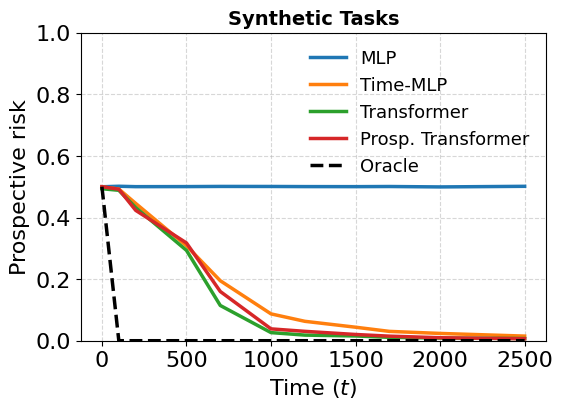

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

files = [
    'experiments/synthetic/multirun/2024-05-19/15-00-45',
    'experiments/synthetic/multirun/2024-05-19/19-56-25',
    'experiments/synthetic/multirun/2024-05-19/14-59-13', 
    'experiments/synthetic/multirun/2024-05-19/14-58-21', 
    'experiments/synthetic/multirun/2024-05-19/20-05-16', 
    None
]

names = [
    'MLP',
    'Time-MLP',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(11):
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            # ci_list.append(outputs['ci_risk'])
        risks = np.array(risk_list)
        # ci = np.array(ci_list)
        if name == 'Oracle':
            risk_list[0] = 0.5
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            # ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            # ci = np.array(outputs['ci_risk'])
            t_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
            # ax.fill_between(t_list, risks-ci, risks+ci, alpha=0.2)
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            # ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Synthetic Tasks (scenario 2)', fontweight='bold', fontsize=14)
plt.show()

In [13]:
fig.savefig("figures/case2_synthetic.pdf", bbox_inches='tight')

## Synthetic (Markov)

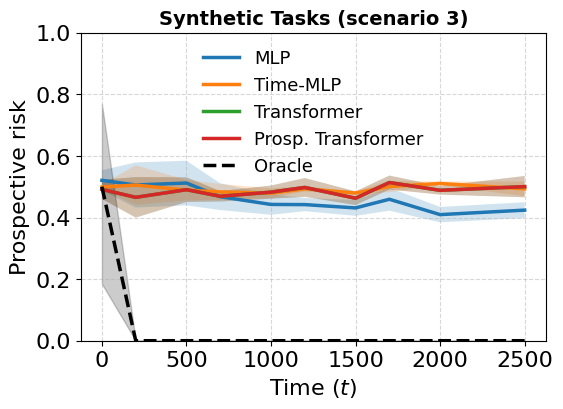

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

files = [
    'experiments/synthetic_markov/multirun/2024-05-20/01-57-02',
    'experiments/synthetic_markov/multirun/2024-05-20/01-56-21',
    'experiments/synthetic_markov/multirun/2024-05-20/01-56-44',
    'experiments/synthetic_markov/multirun/2024-05-20/01-56-44',
    'experiments/synthetic_markov/multirun/2024-05-20/02-13-08',
    None
]

names = [
    'MLP',
    'Time-MLP',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(11):
            if i == 1:
                continue
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            risk_list[0] = 0.5
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            t_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
            ax.fill_between(t_list, risks-ci, risks+ci, alpha=0.2)
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Synthetic Tasks (scenario 3)', fontweight='bold', fontsize=14)
plt.show()

In [28]:
fig.savefig("figures/case3_synthetic.pdf", bbox_inches='tight')

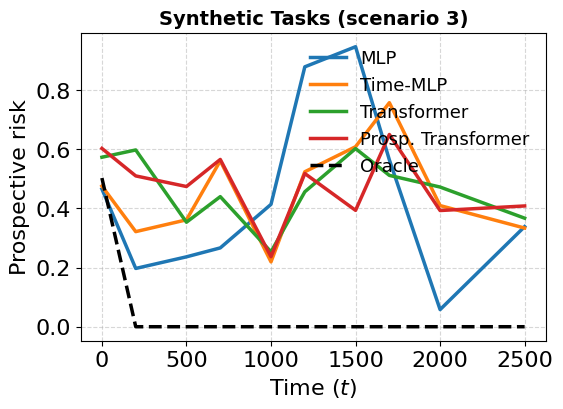

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))

files = [
    None,
    'experiments/synthetic_markov/multirun/2024-05-21/00-17-57',
    None, 
    'experiments/synthetic_markov/multirun/2024-05-21/00-19-12', 
    None,
    None
]

names = [
    'MLP',
    'Time-MLP',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

def compute_discounted_prosp_risk(outputs, gamma=0.9):
    preds = np.array(outputs['raw_metrics']['preds'])
    truths = np.array(outputs['raw_metrics']['truths'])
    shape = preds.shape
    undiscounted_loss = (preds != truths).astype('int')
    weights = np.power(gamma, np.arange(0, shape[2]))
    discounted_loss = np.sum(undiscounted_loss * weights, axis=-1)
    discounted_risks = np.mean(discounted_loss, axis=-1)
    return (1-gamma)*np.mean(discounted_risks)

gamma = 0.9
for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(10):
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(compute_discounted_prosp_risk(outputs))
        risks = np.array(risk_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            t_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('Synthetic Tasks (scenario 3)', fontweight='bold', fontsize=14)
plt.show()

In [48]:
file = 'experiments/synthetic_markov/multirun/2024-05-21/00-19-58'
fname = f'{file}/{3}/outputs.pkl'
with open(fname, 'rb') as f:
    outputs = pickle.load(f)

In [49]:
preds = np.array(outputs['raw_metrics']['preds'])
truths = np.array(outputs['raw_metrics']['truths'])

In [50]:
gamma = 0.9
weights = np.power(gamma, np.arange(1, preds.shape[2]+1))

In [51]:
undiscounted_loss = (preds != truths).astype('int')

In [52]:
undiscounted_loss.shape

(3, 100, 4300)

In [53]:
np.mean(np.sum(undiscounted_loss * weights, axis=-1), axis=-1)

array([2.10367501e-04, 1.48977662e+00, 5.70211197e+00])

In [28]:
preds.shape

(3, 100, 4500)

In [88]:
fig.savefig("figures/case3_fig.pdf", bbox_inches='tight')

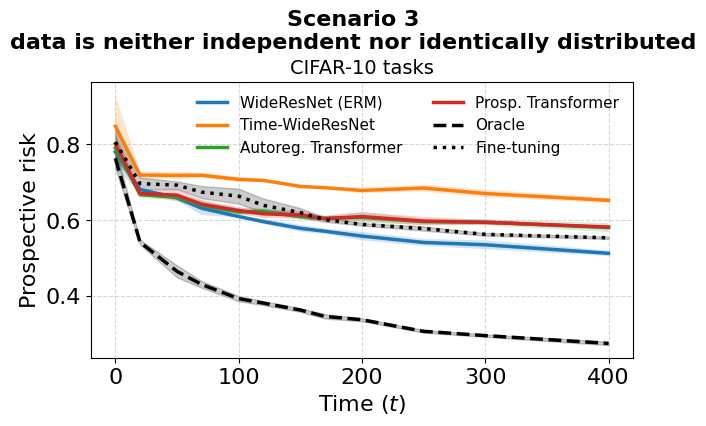

In [135]:
fig, ax = plt.subplots(figsize=(7, 4), sharey=True)

fig.suptitle('Scenario 3' + '\n' + 'data is neither independent nor identically distributed', fontsize=16, fontweight='bold')

# CIFAR-10

files = [
    'experiments/vision_markov/multirun/2024-05-21/10-46-47',
    'experiments/vision_markov/multirun/2024-05-21/03-48-45',
    'experiments/vision_markov/multirun/2024-05-21/03-51-14',
    'experiments/vision_markov/multirun/2024-05-21/03-51-06',
    'experiments/vision_markov/multirun/2024-05-21/03-52-17',
    'experiments/vision_markov/multirun/2024-05-21/09-17-03',
]

names = [
    'WideResNet (ERM)',
    'Time-WideResNet',
    'Autoreg. Transformer',
    'Prosp. Transformer',
    'Oracle',
    'Fine-tuning'
]
N = 10

for file, name in zip(files, names):
    if file:
        if name == 'Fine-tuning':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            time_list = np.array([0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000])/N
            ax.plot(time_list, risks, lw=2.5, color='k', ls='dotted', label='Fine-tuning')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
        else:
            time_list = []
            risk_list = []
            ci_list = []
            for i in range(12):
                fname = f'{file}/{i}/outputs.pkl'
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
                time_list.append(outputs['args']['t'])
                risk_list.append(outputs['risk'])
                ci_list.append(outputs['ci_risk'])
            time_list = np.array(time_list)/N 
            risks = np.array(risk_list)
            ci = np.array(ci_list)
            if name == 'Oracle':
                ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
                ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color='k')
            else:
                ax.plot(time_list, risk_list, lw=2.5, label=name)
                ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue


ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11, ncols=2)
ax.grid(alpha=0.5, ls='--')
ax.set_title('CIFAR-10 tasks', fontsize=14)

plt.subplots_adjust(top=0.80)

plt.show()

In [136]:
fig.savefig("figures/case3_cifar10.pdf", bbox_inches='tight')

## Time-encoding matrices

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/vision_markov/multirun/2024-05-19/13-46-58/0/outputs.pkl'

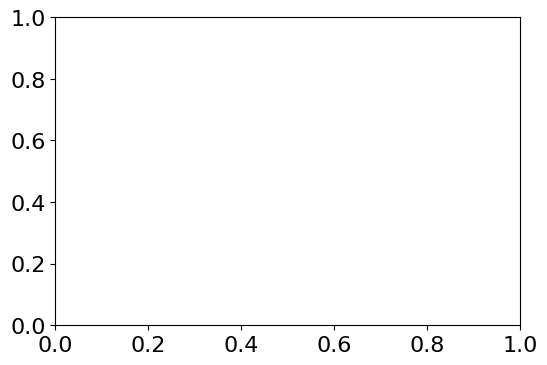

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))

# Synthetic tasks
files = [
    'experiments/vision_markov/multirun/2024-05-19/13-46-58',
    'experiments/vision_markov/multirun/2024-05-19/14-27-26',
    None,
    None, 
    'experiments/vision_markov/multirun/2024-05-19/20-12-51', 
    None
]

names = [
    'Prosp. Transformer (freq.)',
    'Autoreg. Transformer (freq.)',
    'Prosp. Transformer (vanilla)',
    'Autoreg. Transformer (vanilla)'
]

colors = [
    sns.color_palette("Paired")[1],
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[5],
    sns.color_palette("Paired")[4],
]

N = 10

k = 0
for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(10):
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        time_list = np.array(time_list)/N
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        ax.plot(time_list, risk_list, lw=2.5, label=name, color=colors[k])
        ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2, color=colors[k])        
    else:
        continue
    k += 1

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=11)
ax.grid(alpha=0.5, ls='--')
ax.set_title('MNIST tasks', fontsize=14)


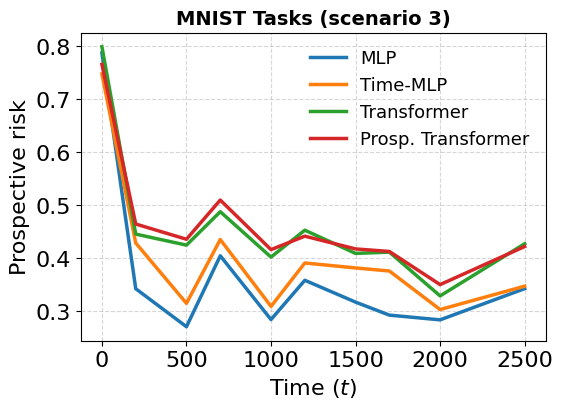

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

files = [
    'experiments/vision_markov/multirun/2024-05-21/01-05-21',
    'experiments/vision_markov/multirun/2024-05-21/01-05-46',
    'experiments/vision_markov/multirun/2024-05-21/01-06-26', 
    'experiments/vision_markov/multirun/2024-05-21/01-06-08',
    None,
    None
]

names = [
    'MLP',
    'Time-MLP',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

def compute_discounted_prosp_risk(outputs, gamma=0.9):
    preds = np.array(outputs['raw_metrics']['preds'])
    truths = np.array(outputs['raw_metrics']['truths'])
    shape = preds.shape
    undiscounted_loss = (preds != truths).astype('int')
    weights = np.power(gamma, np.arange(0, shape[2]))
    discounted_loss = np.sum(undiscounted_loss * weights, axis=-1)
    discounted_risks = np.mean(discounted_loss, axis=-1)
    return (1-gamma)*np.mean(discounted_risks)

gamma = 0.9
for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(10):
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(compute_discounted_prosp_risk(outputs))
        risks = np.array(risk_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            t_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('MNIST Tasks (scenario 3)', fontweight='bold', fontsize=14)
plt.show()